<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


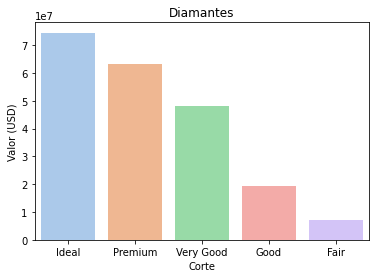

In [2]:
from matplotlib.pyplot import legend
# gráfico do exercício 1

diamonds = data[['cut', 'price']].groupby('cut').agg('sum').reset_index()

#diamonds.head()

grafico_diamantes = sns.barplot(data=diamonds, x='cut', y='price', palette='pastel')
grafico_diamantes.set(title='Diamantes', xlabel='Corte', ylabel='Valor (USD)');



**Insight do gráfico 1**: Nesse grafico podemos ver como o corte pode influenciar no valor da pedra, o corte de um diamante diz respeito a qualidade da lapidação.


---

## 2\. Número de passageiros em dezembro por ano

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
  
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


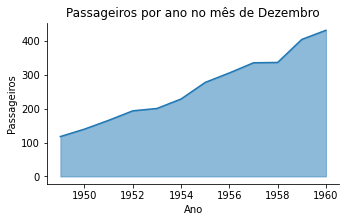

In [4]:
# gráfico do exercício 2

flights = data.query('month == "Dec"')

#flights.head()
grafico_passageiros = sns.FacetGrid(data=flights, palette="pastel")
grafico_passageiros.map(sns.lineplot, "year", "passengers")
grafico_passageiros.map(plt.fill_between, 'year', 'passengers', alpha=0.5)
grafico_passageiros.set(title='Passageiros por ano no mês de Dezembro', xlabel='Ano', ylabel='Passageiros');
grafico_passageiros.fig.set_size_inches(w=15/2.54, h=7.5/2.54)



**Insight do gráfico 2**: Nesse grafico podemos perceber a tendencia igual a do cenario geral, a quantidade de passageiros vem subindo de forma acelerada, podemos perceber tbm que entre 1957 e 1958 a quantidade de passageiros ficou praticamente igual e logo em 1959 e 1960 voltou a subir levando em conta que Dezembro é um mês de férias.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [5]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


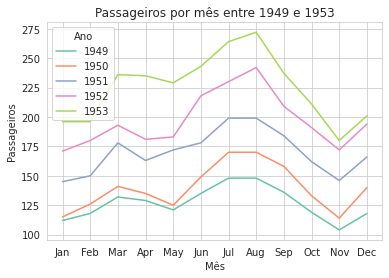

In [6]:
# gráfico do exercício 3

flights_1 = data.query("1949 <= year < 1954")

with sns.axes_style('whitegrid'):

  grafico_passageiro_entre = sns.lineplot(data=flights_1, x='month', y='passengers', hue='year', palette='Set2')
  grafico_passageiro_entre.set(title= 'Passageiros por mês entre 1949 e 1953', xlabel='Mês', ylabel='Passageiros');
  grafico_passageiro_entre.get_legend().set_title('Ano'); 
  

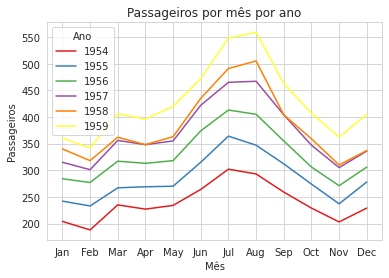

In [7]:
flights_2 = data.query("1954 <= year < 1960")

with sns.axes_style('whitegrid'):

  grafico_passageiro_entre = sns.lineplot(data=flights_2, x='month', y='passengers', hue='year', palette='Set1')
  grafico_passageiro_entre.set(title= 'Passageiros por mês por ano', xlabel='Mês', ylabel='Passageiros');
  grafico_passageiro_entre.get_legend().set_title('Ano');

**Insight do gráfico 3**: Aqui eu decidi fazer mais de uma, no grafico podemos ver uma tendencia de alta no numero de passageiros ano a ano, com os picos nos meses de férias Julho e Agosto, logo na sequencia temos uma queda até o final de Novembro e Dezembro, seguindo o padrão de aumento nos meses de férias começar a apontar uma nova tendencia de alta.






---